In [1]:
import os
import math
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, classification_report
from sklearn.decomposition import PCA, SparsePCA
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer, Normalizer, StandardScaler, scale
from sklearn.externals import joblib

In [2]:
np.random.seed(seed=2323)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/romeokienzler/developerWorks/master/train.csv")

In [4]:
df.shape

(42000, 785)

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [6]:
zeros = df.apply(lambda x: not all(x == 0), axis = 0)
df = df[zeros.index[zeros]]
X = df.iloc[:, 1:df.shape[1]].as_matrix()
X = scale(X)

/Users/dominikpeter/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [7]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)

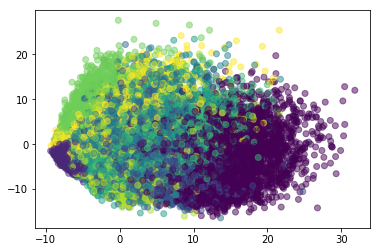

In [8]:
plt.scatter(Xp[:,0], Xp[:,1], c = df['label'], alpha=0.5)
plt.show()

In [9]:
df.head(5)

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = df.iloc[:, 1:df.shape[1]].as_matrix()
X = scale(X)
y = df.iloc[:, 0].as_matrix()

/Users/dominikpeter/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X_train.shape

(33600, 708)

In [13]:
X_test.shape

(8400, 708)

In [15]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=2)
parameters = {'n_estimators': np.arange(300,1000, 10)}
rclf = GridSearchCV(rf, parameters, n_jobs=2, verbose=True)
rclf.fit(X_train, y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 17.4min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 129.8min
[Parallel(n_jobs=2)]: Done 210 out of 210 | elapsed: 145.2min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': array([300, 310, ..., 980, 990])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [16]:
rclf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=940, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
y_test_pred = rclf.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       816
          1       0.98      0.99      0.99       909
          2       0.97      0.96      0.97       846
          3       0.96      0.95      0.95       937
          4       0.96      0.97      0.97       839
          5       0.97      0.95      0.96       702
          6       0.97      0.98      0.97       785
          7       0.97      0.95      0.96       893
          8       0.96      0.96      0.96       835
          9       0.93      0.95      0.94       838

avg / total       0.96      0.96      0.96      8400



In [18]:
10.0 ** -np.arange(1, 7)

array([  1.00000000e-01,   1.00000000e-02,   1.00000000e-03,
         1.00000000e-04,   1.00000000e-05,   1.00000000e-06])

In [19]:
nn = MLPClassifier(solver='lbfgs',
        hidden_layer_sizes=(1000, 500, 200, ), random_state=1)

In [20]:
parameters = {'alpha':(10.0 ** -np.arange(1, 7))}
nclf = GridSearchCV(nn, parameters, n_jobs=4, verbose=True)
nclf.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed: 41.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1000, 500, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'alpha': array([  1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         1.00000e-05,   1.00000e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)

In [21]:
nclf.best_estimator_

MLPClassifier(activation='relu', alpha=1.0000000000000001e-05,
       batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(1000, 500, 200),
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [22]:
y_test_pred = nclf.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(accuracy_score(y_test_true, y_test_pred, normalize=True, sample_weight=None))

0.969642857143


In [23]:
print(classification_report(y_test_true, y_test_pred))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       816
          1       0.99      0.98      0.99       909
          2       0.97      0.95      0.96       846
          3       0.97      0.96      0.96       937
          4       0.96      0.97      0.96       839
          5       0.95      0.96      0.96       702
          6       0.97      0.98      0.97       785
          7       0.97      0.97      0.97       893
          8       0.96      0.97      0.97       835
          9       0.96      0.96      0.96       838

avg / total       0.97      0.97      0.97      8400



In [ ]:
parameters = {'weights':[[1,1], [1,2], [2,1]]}
vc = VotingClassifier(estimators=[('rf', rclf),('nn', nclf)], voting='soft')
fclf = GridSearchCV(vc, parameters, verbose=True)
fclf.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 70 candidates, totalling 210 fits


/Users/dominikpeter/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


Fitting 3 folds for each of 70 candidates, totalling 210 fits


/Users/dominikpeter/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)


In [ ]:
fclf.best_estimator_

In [ ]:
y_test_pred = fclf.predict(X_test)
y_test_true = y_test

#print(roc_auc_score(y_test_true, y_test_pred, average='macro',sample_weight=None))
print(accuracy_score(y_test_true, y_test_pred, normalize=True, sample_weight=None))